In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip


In [2]:
import zipfile

with zipfile.ZipFile("/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip","r") as z:
    z.extractall(".")
with zipfile.ZipFile("/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip","r") as z:
    z.extractall(".")

In [3]:
CONST_TRAIN_DIR = "/kaggle/working/train/"
CONST_TEST_DIR = "/kaggle/working/test/"

CONST_ROWS = 64
CONST_COLS = 64
CONST_CHANNELS = 3

all_train = []
dogs_train = []
cats_train = []
labels = []

for img in os.listdir(CONST_TRAIN_DIR):
    file_dir = CONST_TRAIN_DIR + img
    all_train.append(file_dir)
    if "dog" in img:
        labels.append(1)
        dogs_train.append(file_dir)
    else:
        labels.append(0)
        cats_train.append(file_dir)
        
all_test = [CONST_TEST_DIR+img for img in os.listdir(CONST_TEST_DIR)]

print(len(all_train), len(dogs_train), len(cats_train))

25000 12500 12500


In [4]:
list_ids = []
for img in os.listdir(CONST_TEST_DIR):
    sp = img.split(".")[0]
    list_ids.append(sp)
list_ids

['9004',
 '6883',
 '4933',
 '1019',
 '8178',
 '2697',
 '898',
 '8921',
 '2521',
 '9078',
 '4465',
 '3653',
 '9121',
 '12341',
 '6447',
 '2441',
 '92',
 '3028',
 '534',
 '1254',
 '5867',
 '11973',
 '8298',
 '5421',
 '9777',
 '3440',
 '5025',
 '2473',
 '5064',
 '7085',
 '731',
 '11895',
 '4270',
 '859',
 '5140',
 '9097',
 '12110',
 '6933',
 '4825',
 '6033',
 '9646',
 '4114',
 '11543',
 '7679',
 '11559',
 '9336',
 '10988',
 '4624',
 '6088',
 '7445',
 '6149',
 '10008',
 '7651',
 '2814',
 '1009',
 '8499',
 '4828',
 '9035',
 '190',
 '4999',
 '7517',
 '10059',
 '9759',
 '9328',
 '8893',
 '3557',
 '11521',
 '5925',
 '8905',
 '7049',
 '10771',
 '671',
 '2271',
 '7245',
 '2503',
 '8809',
 '4237',
 '4750',
 '5491',
 '7863',
 '5604',
 '11022',
 '137',
 '1912',
 '10335',
 '9070',
 '5586',
 '6649',
 '7628',
 '10978',
 '9855',
 '747',
 '929',
 '3522',
 '8735',
 '10465',
 '2907',
 '7662',
 '6981',
 '11524',
 '241',
 '3997',
 '5513',
 '4376',
 '7663',
 '3083',
 '8663',
 '10377',
 '7982',
 '12192',
 '76

In [5]:
import cv2

def image_preparation(image):
        img = cv2.imread(image, cv2.IMREAD_COLOR)
        return cv2.resize(img, (CONST_ROWS, CONST_COLS), interpolation=cv2.INTER_CUBIC)

def data_preparation(images): 
    count = len(images)
    data = np.ndarray((count, CONST_CHANNELS, CONST_ROWS, CONST_COLS), dtype=np.uint8)
    
    for index, img_dir in enumerate(images):
        image = image_preparation(img_dir)
        data[index] = image.T
        if index % 1000 == 0:
            print(f"On going: {index} of {count}")
    print(f"Data: {data.shape}")
    return data

train = data_preparation(all_train)
test = data_preparation(all_test)

On going: 0 of 25000
On going: 1000 of 25000
On going: 2000 of 25000
On going: 3000 of 25000
On going: 4000 of 25000
On going: 5000 of 25000
On going: 6000 of 25000
On going: 7000 of 25000
On going: 8000 of 25000
On going: 9000 of 25000
On going: 10000 of 25000
On going: 11000 of 25000
On going: 12000 of 25000
On going: 13000 of 25000
On going: 14000 of 25000
On going: 15000 of 25000
On going: 16000 of 25000
On going: 17000 of 25000
On going: 18000 of 25000
On going: 19000 of 25000
On going: 20000 of 25000
On going: 21000 of 25000
On going: 22000 of 25000
On going: 23000 of 25000
On going: 24000 of 25000
Data: (25000, 3, 64, 64)
On going: 0 of 12500
On going: 1000 of 12500
On going: 2000 of 12500
On going: 3000 of 12500
On going: 4000 of 12500
On going: 5000 of 12500
On going: 6000 of 12500
On going: 7000 of 12500
On going: 8000 of 12500
On going: 9000 of 12500
On going: 10000 of 12500
On going: 11000 of 12500
On going: 12000 of 12500
Data: (12500, 3, 64, 64)


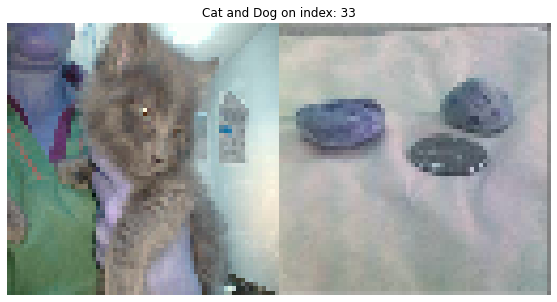

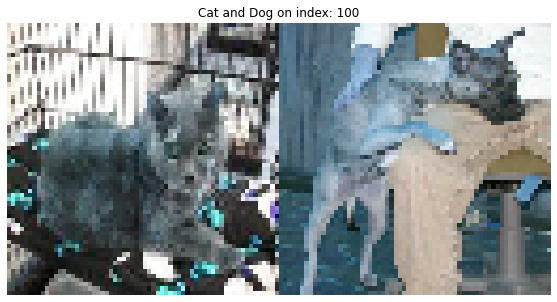

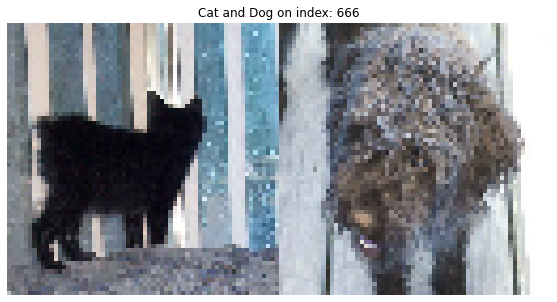

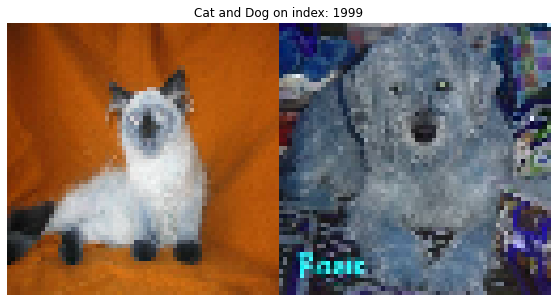

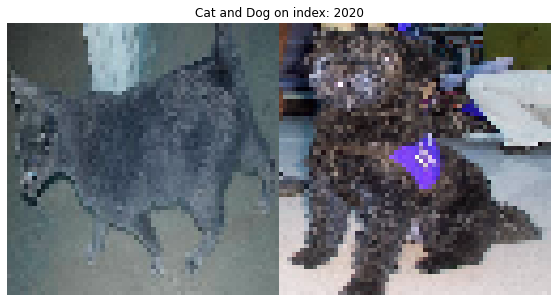

In [6]:
import matplotlib.pyplot as plt

def show(index):
    cat = image_preparation(cats_train[index])
    dog = image_preparation(dogs_train[index])
    both = np.concatenate((cat, dog), axis=1)
    plt.figure(figsize=(10,5))
    plt.axis('off')
    plt.grid(b=None)
    plt.imshow(both)
    plt.title(f"Cat and Dog on index: {index}")
    plt.show()
    
for index in [33, 100, 666, 1999, 2020]:
    show(index)

Text(0.5, 1.0, 'Average Cat and Dog')

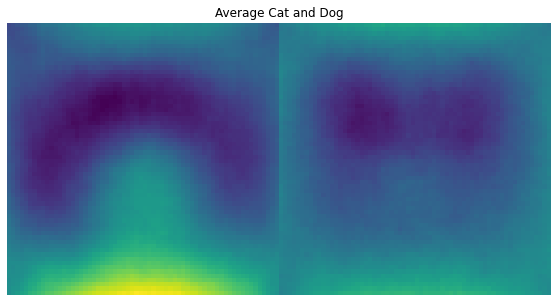

In [7]:
average_cat = np.array([cat[0].T for index, cat in enumerate(train) if labels[index]==0]).mean(axis=0)
average_dog = np.array([dog[0].T for index, dog in enumerate(train) if labels[index]==1]).mean(axis=0)
both = np.concatenate((average_cat, average_dog), axis=1)
plt.figure(figsize=(10,5))
plt.axis('off')
plt.grid(b=None)
plt.imshow(both)
plt.title("Average Cat and Dog")

In [8]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback

def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]


tfback._get_available_gpus = _get_available_gpus

Using TensorFlow backend.


In [9]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop

optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'


def catdog():
    
    model = Sequential()

    model.add(Convolution2D(32, (3, 3), padding='same', input_shape=(3, CONST_ROWS, CONST_COLS), activation='relu'))
    model.add(Convolution2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

    model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    
    model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Convolution2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    
    model.add(Convolution2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Convolution2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Convolution2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

    model.add(Convolution2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Convolution2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Convolution2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model


model = catdog()

In [10]:
from keras.callbacks import Callback, EarlyStopping

nb_epoch = 10
batch_size = 16

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get("loss"))
        self.val_losses.append(logs.get("val_loss"))

early_stopping = EarlyStopping(monitor="val_loss", patience=3, verbose=1, mode="auto")

def run_catdog():
    history = LossHistory()
    model.fit(train, labels, batch_size=batch_size, nb_epoch=nb_epoch, validation_split=0.25, verbose=0, shuffle=True, callbacks=[history, early_stopping])
    
    predictions = model.predict(test, verbose=0)
    return predictions, history

predictions, history = run_catdog()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 00006: early stopping


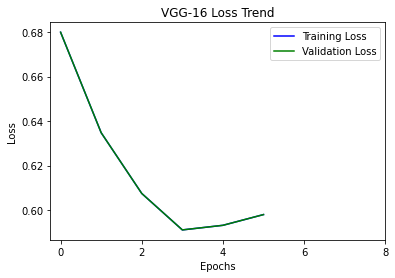

In [11]:
loss = history.losses
val_loss = history.losses

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("VGG-16 Loss Trend")
plt.plot(loss, "blue", label="Training Loss")
plt.plot(val_loss, "green", label="Validation Loss")
plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()

100.00% Dog


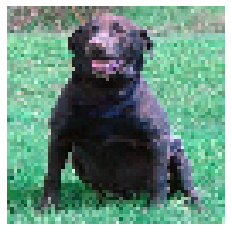

76.16% Dog


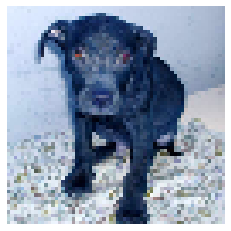

68.01% Cat


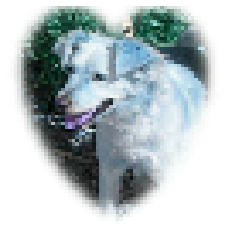

65.74% Dog


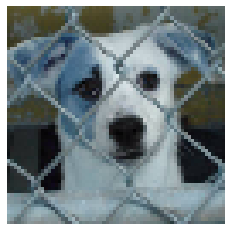

85.99% Cat


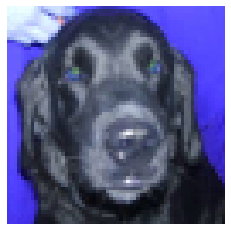

53.83% Dog


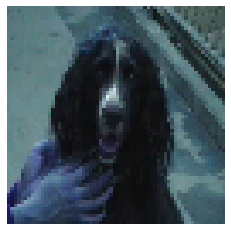

53.89% Cat


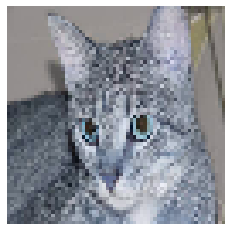

61.84% Cat


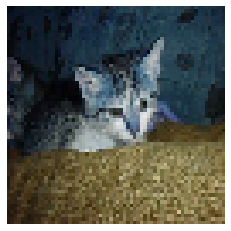

In [12]:
for i in [3,567,854,432,65,1117,1076,245]:
    if predictions[i, 0] >= 0.5: 
        print('{:.2%} Dog'.format(predictions[i][0]))
    else: 
        print('{:.2%} Cat'.format(1-predictions[i][0]))
    plt.axis('off')
    plt.grid(b=None)
    plt.imshow(test[i].T)
    plt.show()

In [13]:
cat_count = 0
dog_count = 0
for pred in predictions:
    if pred[0] >= 0.5:
        dog_count += 1
    else:
        cat_count += 1
print(cat_count, dog_count)

7685 4815


In [14]:
indexes = list(range(1, len(predictions)+1))

In [15]:
indexes

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [16]:
pred = []
for p in predictions:
    pred.append(p[0])
pred
len(pred)

12500

In [17]:
output = pd.DataFrame({'id': list_ids, 'label': pred})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [18]:
model.save_weights("/kaggle/working/model.h5", overwrite=True)